In [1]:
import shutil
import os

shutil.copy2('./measdata/Verbatim_Simple_Flip_measurements.csv', 
             './measdata/State1.csv')
shutil.copy2('./measdata/Verbatim_Simple_Identity_measurements.csv', 
             './measdata/State0.csv')

'./measdata/State0.csv'

In [1]:
import numpy as np

qubits = np.loadtxt('./measdata/Verbatim_Simple_Identity_measured_qubits.csv', delimiter=',')
qubits_0 = np.array(qubits, dtype=int)

qubits = np.loadtxt('./measdata/Verbatim_Simple_Flip_measured_qubits.csv', delimiter=',')
qubits_1 = np.array(qubits, dtype=int)

Loaded 8192 shots for State 0.
Loaded 8192 shots for State 1.

--- Starting Calibration ---
Calibrating |0> state...
Inferring Qubit 1 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.025
Given Lambda |0>: prior error rate = 0.0250


<Figure size 640x480 with 0 Axes>

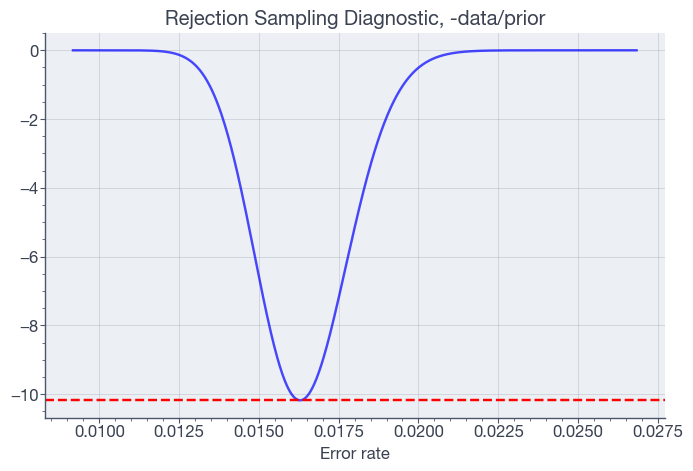

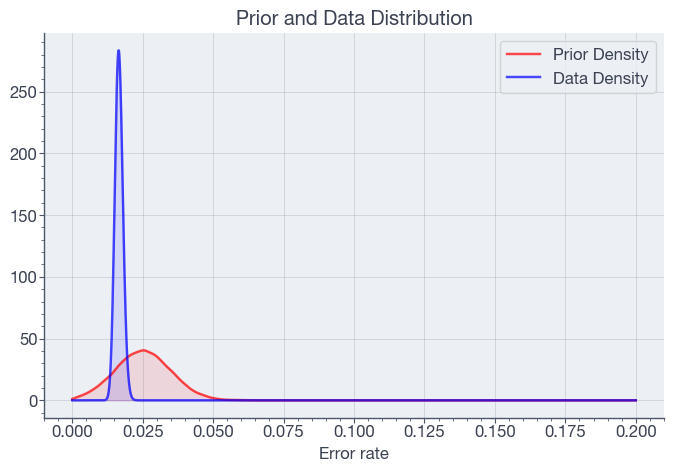

   Accepted N: 4047 (10.1%)
Inferring Qubit 2 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.011
Given Lambda |0>: prior error rate = 0.0110


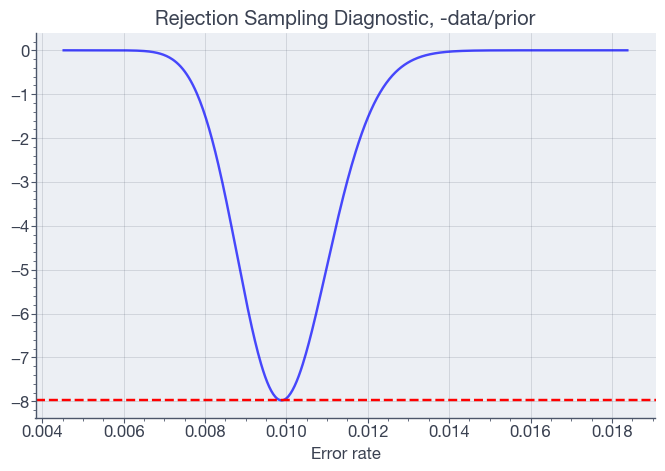

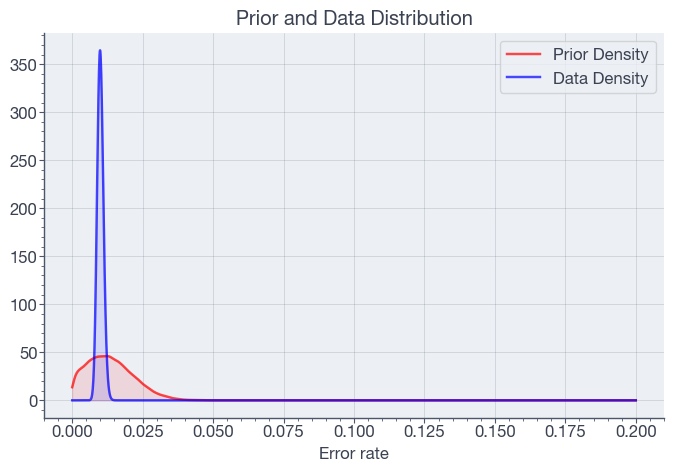

   Accepted N: 5041 (12.6%)
Inferring Qubit 3 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.007
Given Lambda |0>: prior error rate = 0.0070


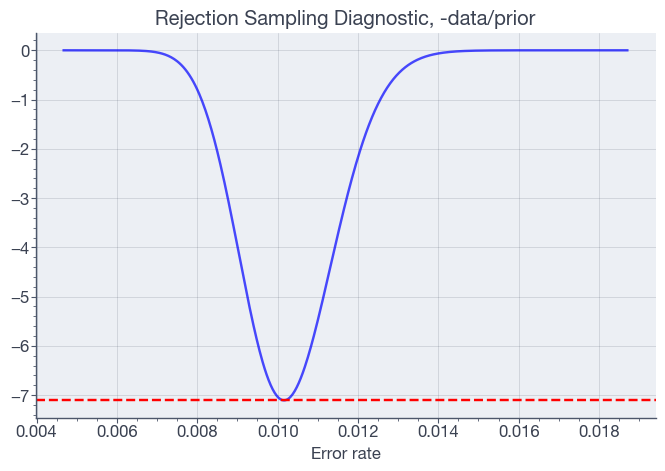

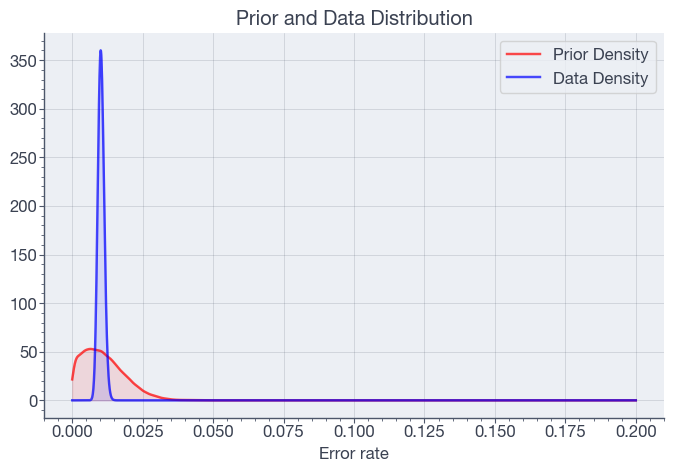

   Accepted N: 5685 (14.2%)
Inferring Qubit 4 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.01
Given Lambda |0>: prior error rate = 0.0100


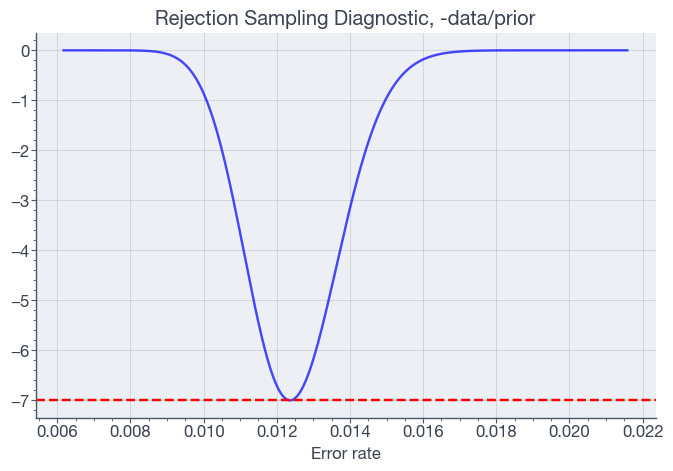

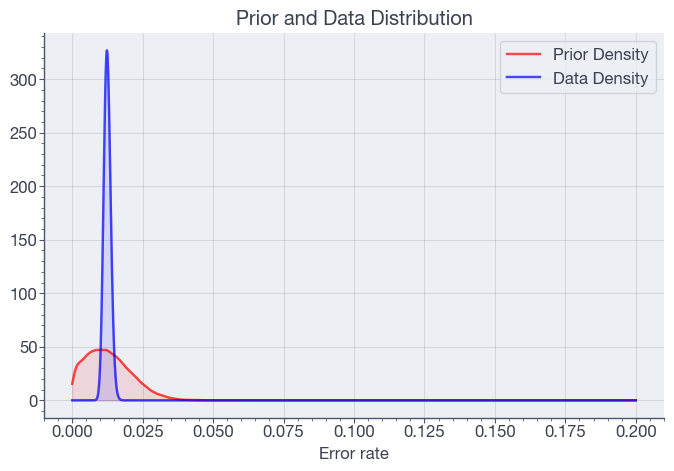

   Accepted N: 5779 (14.4%)
Inferring Qubit 5 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.0145
Given Lambda |0>: prior error rate = 0.0145


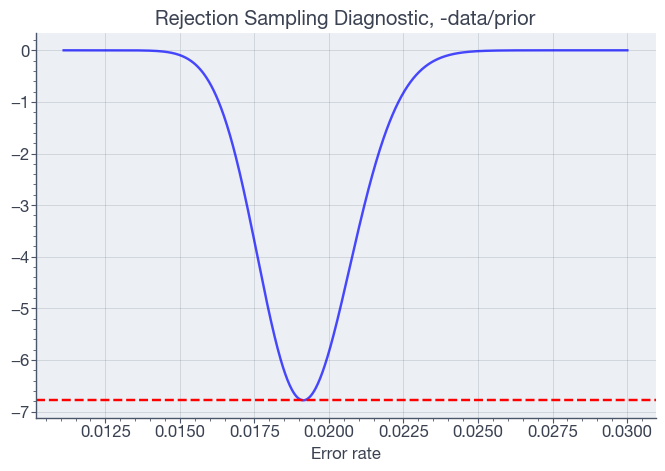

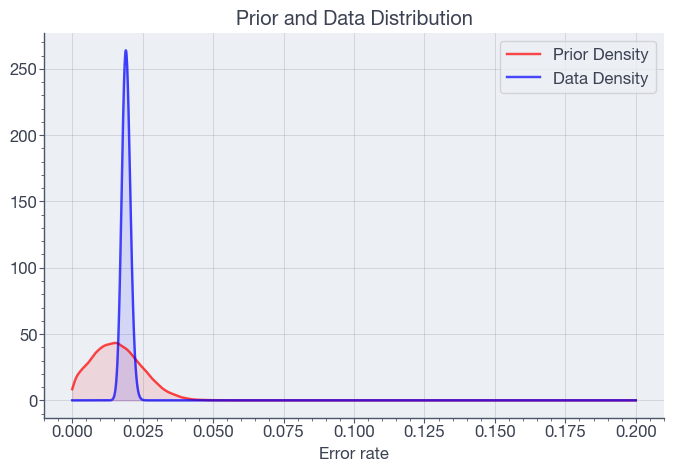

   Accepted N: 5884 (14.7%)
Inferring Qubit 6 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.0075
Given Lambda |0>: prior error rate = 0.0075


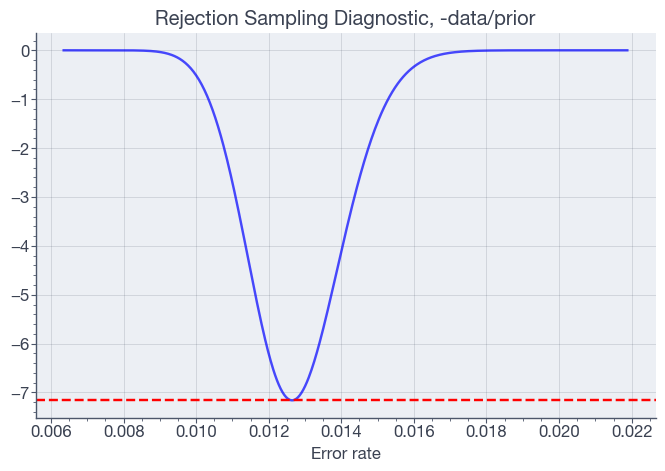

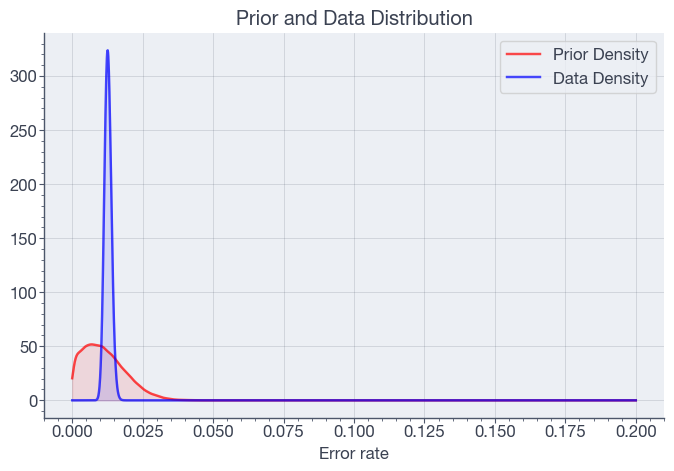

   Accepted N: 5590 (14.0%)
Inferring Qubit 7 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.033
Given Lambda |0>: prior error rate = 0.0330


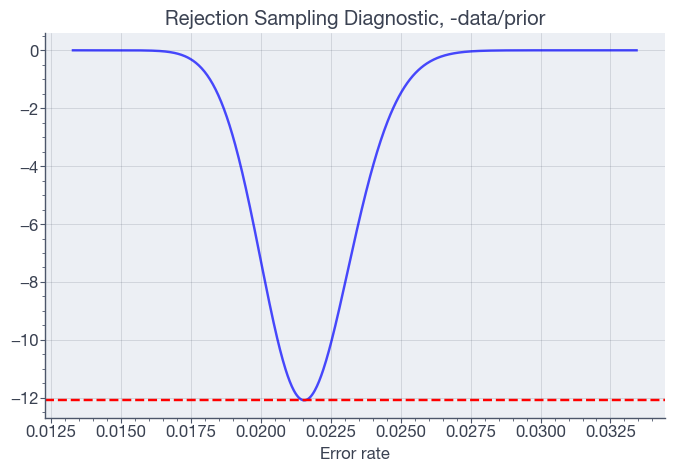

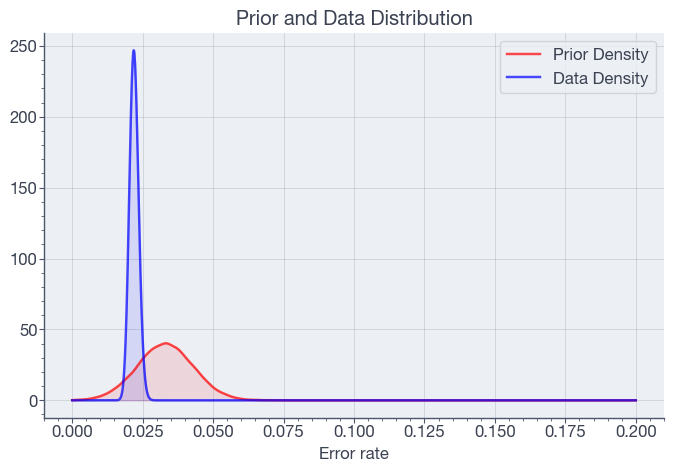

   Accepted N: 3264 (8.2%)
Inferring Qubit 8 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.0115
Given Lambda |0>: prior error rate = 0.0115


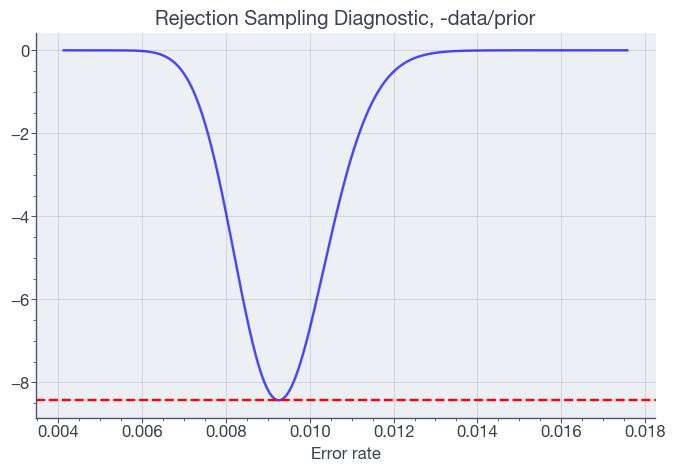

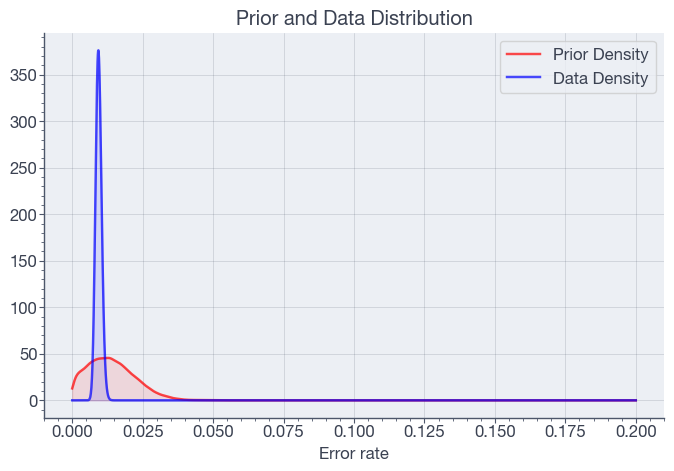

   Accepted N: 4818 (12.0%)
Inferring Qubit 9 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.013
Given Lambda |0>: prior error rate = 0.0130


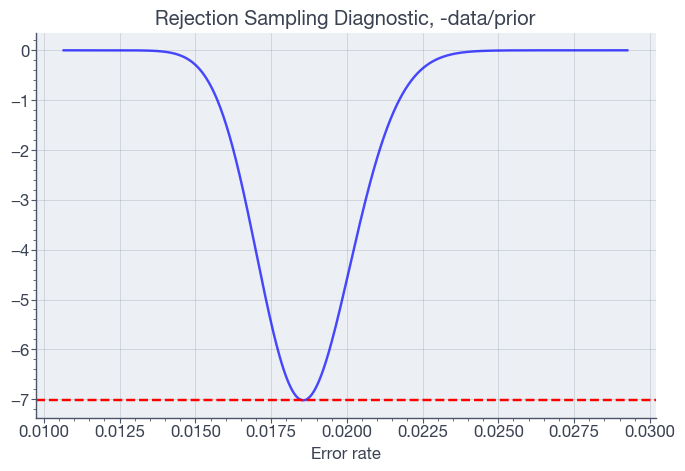

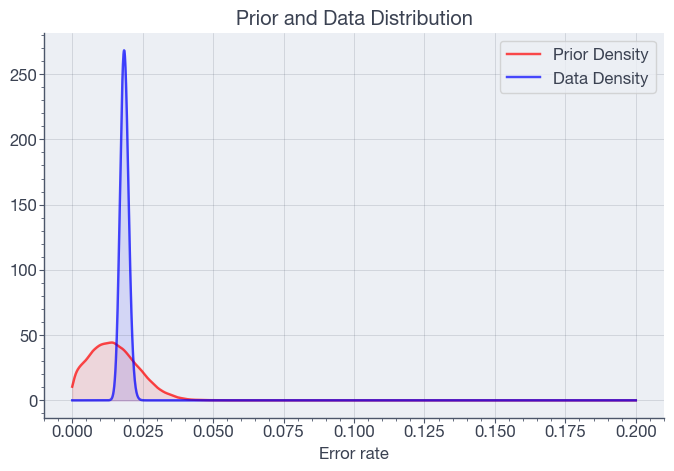

   Accepted N: 5649 (14.1%)
Inferring Qubit 10 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.012
Given Lambda |0>: prior error rate = 0.0120


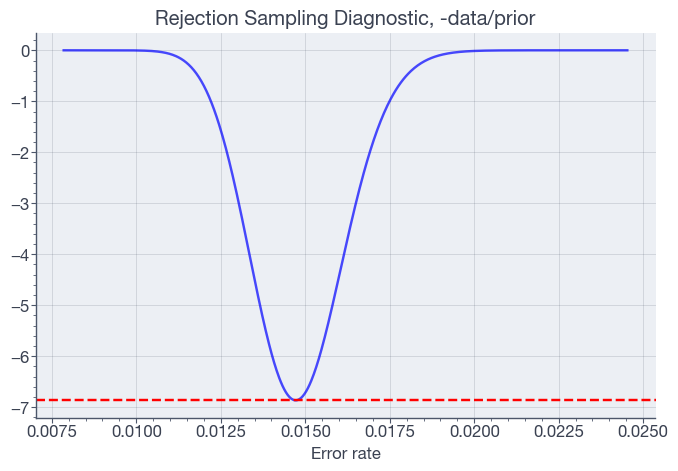

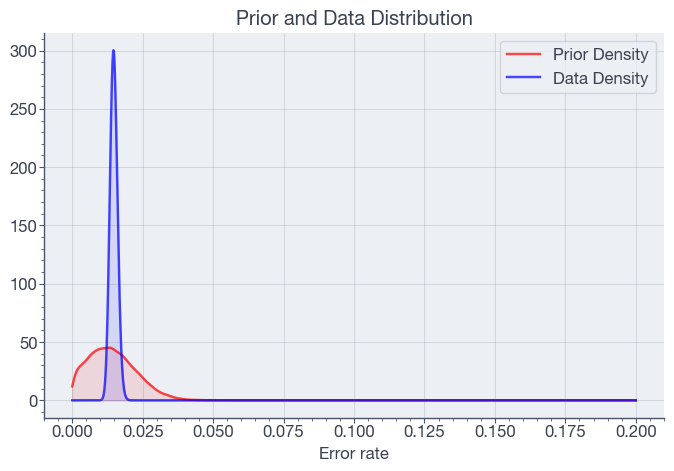

   Accepted N: 5866 (14.7%)
Inferring Qubit 11 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.009
Given Lambda |0>: prior error rate = 0.0090


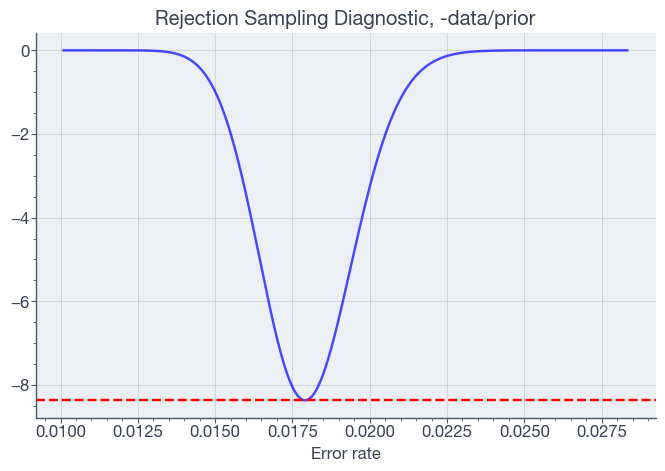

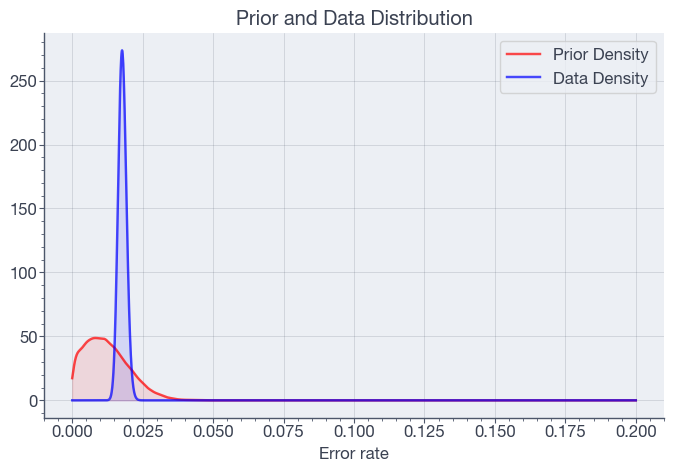

   Accepted N: 4742 (11.9%)
Inferring Qubit 12 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.0155
Given Lambda |0>: prior error rate = 0.0155


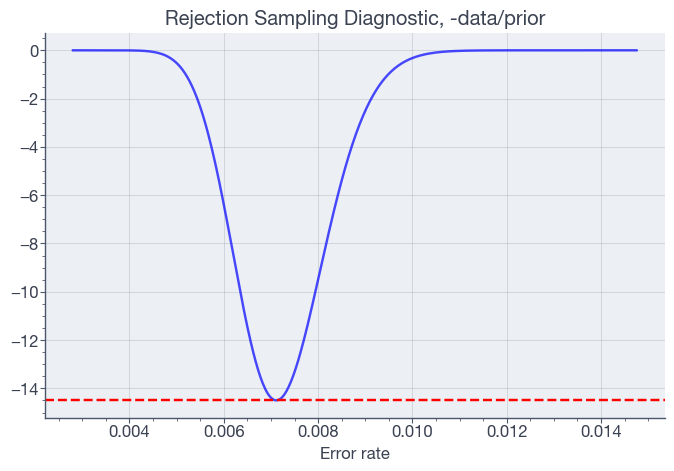

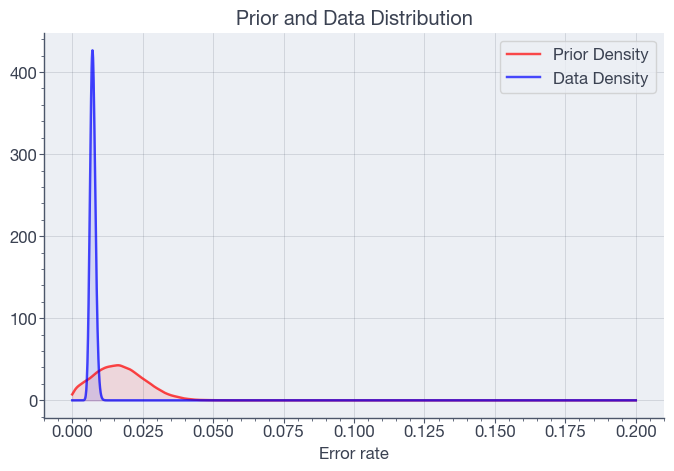

   Accepted N: 2735 (6.8%)
Inferring Qubit 13 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.0135
Given Lambda |0>: prior error rate = 0.0135


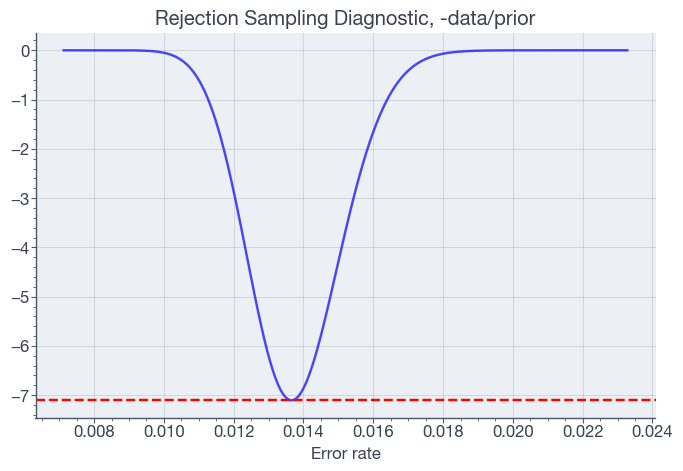

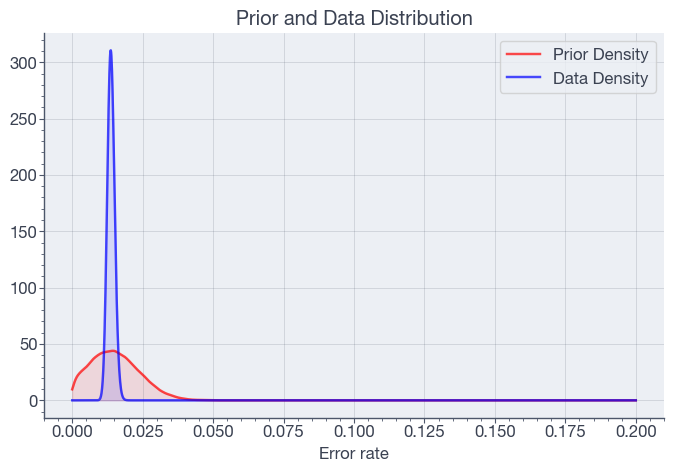

   Accepted N: 5643 (14.1%)
Inferring Qubit 14 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.011
Given Lambda |0>: prior error rate = 0.0110


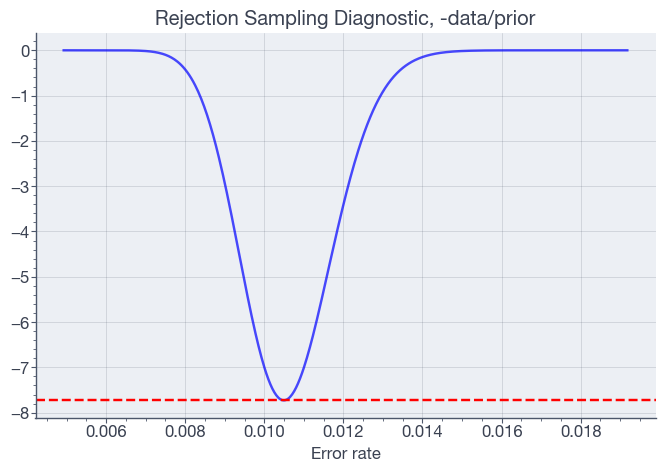

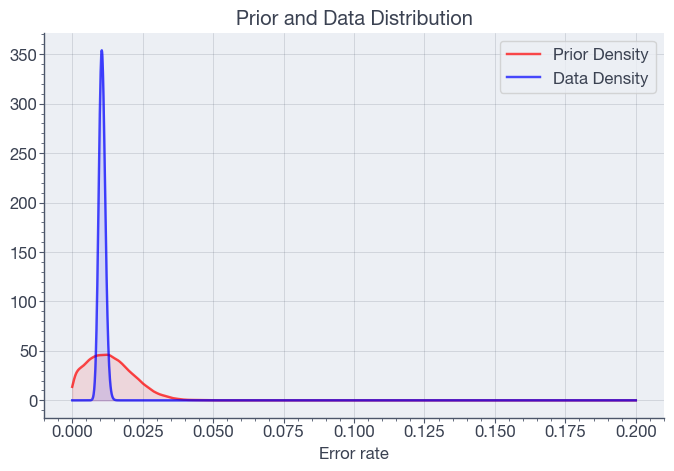

   Accepted N: 5178 (12.9%)
Inferring Qubit 15 for State |0>
From the Braket Calibration, we have a prior error rate of: 0.017
Given Lambda |0>: prior error rate = 0.0170


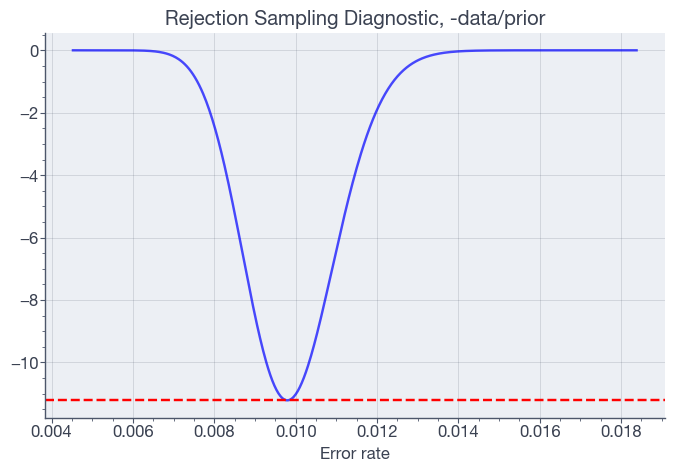

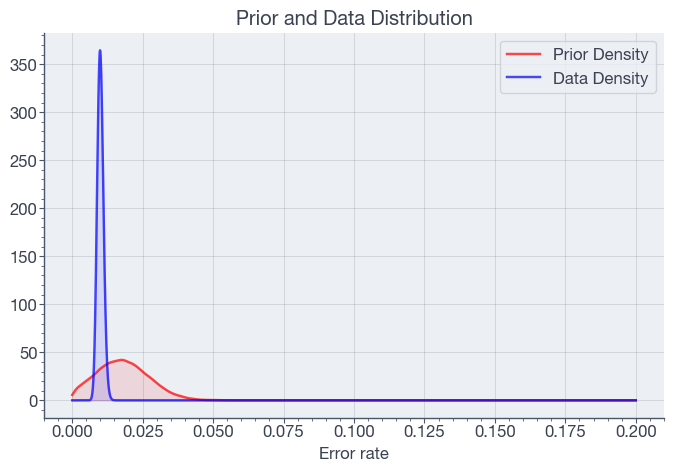

In [ ]:
from src.splitmeasfilter import SplitMeasFilter  # Assuming class is saved here

# Initialize
# Qubit order must match your bitstrings (e.g., '01' -> q1=0, q0=1 or vice versa depending on endianness)
# Standard Qiskit/Braket is usually Little Endian (Rightmost is q0)
# qubits = [1,2,3] 
my_filter = SplitMeasFilter(qubit_order=qubits, file_address='./measdata/')

print("\n--- Starting Calibration ---")

## providing the true errors which I used to simulate the data in samples/CZ_test.ipynb
# my_filter.params = {
#     'Qubit1': {'err0': 0.067, 'err1': 0.072},
#     'Qubit2': {'err0': 0.095, 'err1': 0.085},
#     'Qubit3': {'err0': 0.035, 'err1': 0.005}
# }

# Pass 1: Calibrate Error on State |0>
print("Calibrating |0> state...")
my_filter.qubit_order = list(qubits_0)
my_filter.inference(prep_state='0', nPrior=40000, prior_sd= 0.01)

# Pass 2: Calibrate Error on State |1>
print("Calibrating |1> state...")
my_filter.qubit_order = list(qubits_1)
my_filter.inference(prep_state='1', nPrior=40000, prior_sd= 0.01)

print("Inference Complete.")

In [ ]:
my_filter.post_full

In [ ]:
my_filter.

In [ ]:
import json
from datetime import datetime

class NumpyEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, np.ndarray):
            return o.tolist()
        if isinstance(o, np.integer):
            return int(o)
        if isinstance(o, np.floating):
            return float(o)
        return super(NumpyEncoder, self).default(o)


# Update extensions to .json
full_path_datetime = os.path.join(my_filter.file_address, f'Post_Full_{datetime.now().strftime("%Y%m%d_%H%M%S")}.json')
full_path_current = os.path.join(my_filter.file_address, 'Post_Full_Current.json')
meanmode_path_datetime = os.path.join(my_filter.file_address, f'Post_MeanMode_{datetime.now().strftime("%Y%m%d_%H%M%S")}.json')
meanmode_path_current = os.path.join(my_filter.file_address, 'Post_MeanMode_Current.json')

# Save using the NumpyEncoder
with open(full_path_datetime, 'w') as f:
    json.dump(my_filter.post_full, f, cls=NumpyEncoder)

with open(meanmode_path_datetime, 'w') as f:
    json.dump(my_filter.post, f, cls=NumpyEncoder)

with open(full_path_current, 'w') as f:
    json.dump(my_filter.post_full, f, cls=NumpyEncoder)

with open(meanmode_path_current, 'w') as f:
    json.dump(my_filter.post, f, cls=NumpyEncoder)

print(f"Saved Full Posterior to:\n{full_path_datetime}\nand\n{full_path_current}")
print(f"Saved Mean/Mode Summary to:\n{meanmode_path_datetime}\nand\n{meanmode_path_current}")

In [ ]:
my_filter.data

In [ ]:
from src.splitmeasfilter import SplitMeasFilter  # Assuming class is saved here
import numpy as np

qubits = np.loadtxt('./measdata/Verbatim_Simple_Identity_measured_qubits.csv', delimiter=',')
qubits = np.array(qubits, dtype=int)

# Initialize
# Qubit order must match your bitstrings (e.g., '01' -> q1=0, q0=1 or vice versa depending on endianness)
# Standard Qiskit/Braket is usually Little Endian (Rightmost is q0)
# qubits = [1,2,3] 
my_filter = SplitMeasFilter(qubit_order=qubits, file_address='./measdata/',)

my_filter.error_distributions(num_points= 8)

In [ ]:
my_filter.post_full